In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)


### QDA
QDA(Quadratic Discriminant Analysis)는 조건부확률 기반 생성(generative) 모형의 하나이다. 
예를 들어 다음과 같이 두 가지 클래스의 데이터가 있다고 하자. 스캐터 플롯의 데이터 색은 각 데이터의 클래스를 나타낸다. 검은색은  y=0 인 클래스이고 흰색은  y=1 인 클래스이다. 
3개씩으로 이루어진 두 클래스 데이터가 서로 대칭을 이루고 있다는 점에 주의하자.

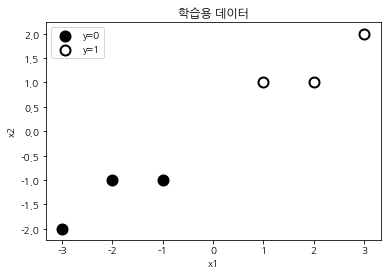

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.title("학습용 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [4]:
# 다음 그림들은 이 분류문제를 QDA 방법으로 푼 결과이다.

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X, y)

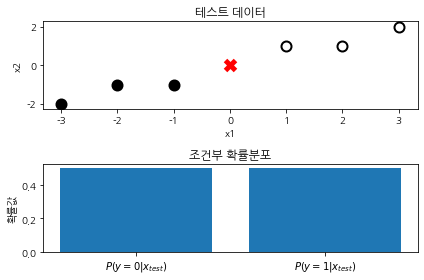

In [6]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

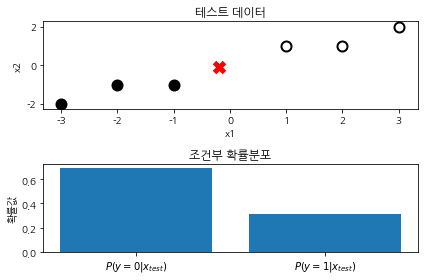

In [8]:
# 만약 테스트 데이터가  y=0 인 클래스에 더 가깝다면  P(y=0|xtest) 가 0.5보다 커지게 된다.
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

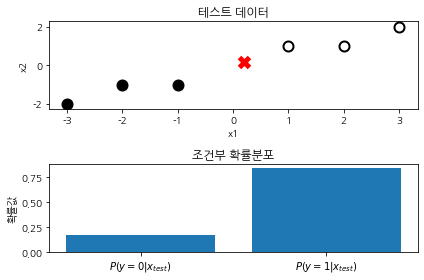

In [9]:
# 반대로 테스트 데이터가  y=1 인 클래스에 더 가깝다면  P(y=1|xtest) 가 0.5보다 커지게 된다.
x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()


### 나이브 베이지안 모형
조건부확률 기반 생성 모형의 장점 중 하나는 클래스가 3개 이상인 경우에도 바로 적용할 수 있다는 점이다. 
나이브 베이지안(Naive Bayesian) 모형도 조건부확률 모형의 일종이다.

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n + 1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("실제 클래스:", news.target_names[news.target[n]])
print("예측 클래스:", news.target_names[y])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

실제 클래스: comp.sys.ibm.pc.hardware
예측 

```
다음 그림은 나이브 베이지안 모형으로 특정한 텍스트 데이터가 20개의 카테고리에 속할 확률을 각각 계산한 것이다. 
위쪽 플롯은 확률값이고 아래쪽 플롯은 로그 변환한 값이다.
```

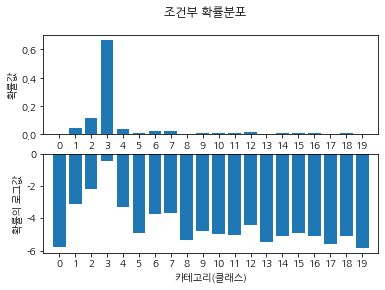

In [11]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률의 로그값")
plt.suptitle("조건부 확률분포")
plt.show()

In [14]:
# 로그를 이용하면 값이 작아 불분명했던 수치들이 확대되어 구분이 쉬어짐
# 0~1사이라 음수가 나옴

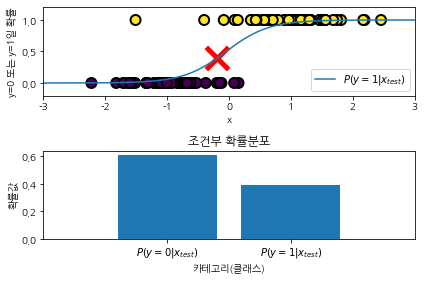

In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

x_test = [[-0.2]]

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x_test[0], model.predict_proba(x_test)[0][1:], marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.xlabel("x")
plt.ylabel("y=0 또는 y=1일 확률")
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(x_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("조건부 확률분포")
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

### 판별함수 모형
또 다른 분류 방법은 동일한 클래스가 모여 있는 영역과 그 영역을 나누는 경계면(boundary plane)을 정의하는 것이다. 이 경계면은 경계면으로부터의 거리를 계산하는  f(x)  형태의 함수인 판별함수(discriminant function)로 정의된다. 
판별함수의 값의 부호에 따라 클래스가 나뉘어진다.
사이킷런에서 판별함수 모형은 판별함수값을 출력하는 decision_function 메서드를 제공한다.

#### 퍼셉트론
퍼셉트론(Perceptron)은 가장 단순한 판별함수 모형이다. 
다음 그림과 같이 직선이 경계선(boundary line)으로 데이터 영역을 나눈다.

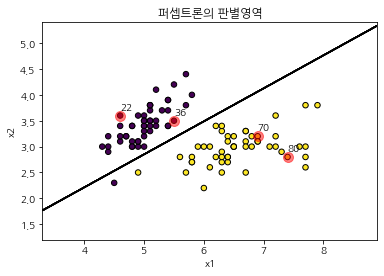

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
# 클래스 2개까지만 판별가능,,
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.grid(False)
plt.title("퍼셉트론의 판별영역")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

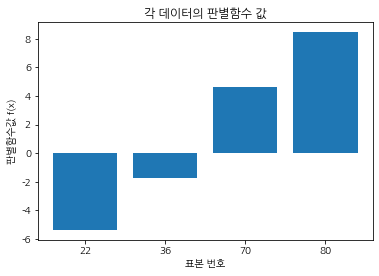

In [17]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("각 데이터의 판별함수 값")
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.show()

```
만약 데이터의 차원이 3차원이라면 다음과 같이 경계면(boundary surface)을 가지게 된다. 
이러한 경계면이나 경계선을 의사결정 '하이퍼 플레인(decision hyperplane)'이라고 한다.
```

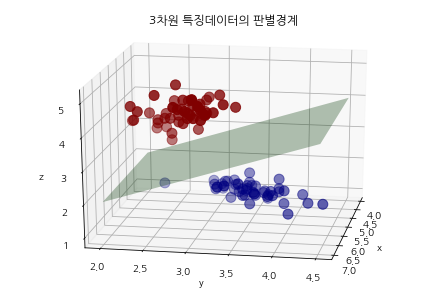

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3)
plt.title("3차원 특징데이터의 판별경계")
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
plt.show()


#### 커널 SVM
커널 SVM(Kernel Support Vector Machine)을 사용하면 다음과 같이 복잡한 형태의 경계선을 생성할 수도 있다.

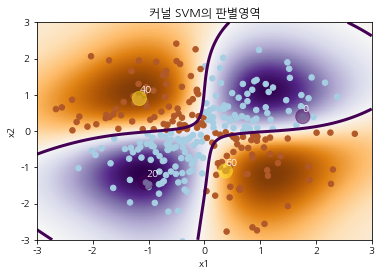

In [19]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("커널 SVM의 판별영역")
plt.show()

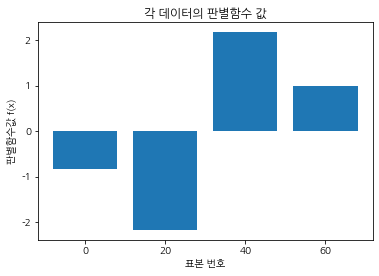

In [20]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.title("각 데이터의 판별함수 값")
plt.show()

### 다중 클래스 분류
확률적 모형은 클래스가 3개 이상인 경우를 다중 클래스(Multi-Class) 분류문제도 풀 수 있지만 
판별함수 모형은 종속변수의 클래스가 2개인 경우를 이진(Binary Class) 분류문제밖에는 풀지 못한다.
이때는 OvO (One-Vs-One) 방법이나 OvR (One-vs-the-Rest) 방법 등을 이용하여 
여러개의 이진 클래스 분류문제로 변환하여 푼다.

### 5.4 분류 성능평가

### 분류결과표
분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다. 
정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.

In [21]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [22]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

#### 이진분류 결과표

In [23]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [25]:
# labels로 순서를 바꿀수 있음
confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[3, 1],
       [0, 2]], dtype=int64)

```
사이킷런 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report 명령을 제공한다. 
이 명령은 각각의 클래스를 양성(positive) 클래스로 보았을 때의 
정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.
```

In [26]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [27]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



### ROC커브

In [30]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


In [29]:
# 이진 결과 분류표
confusion_matrix(y, y_hat, labels=[1, 0])

array([[7, 1],
       [1, 7]], dtype=int64)

In [31]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.36316277,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [33]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.9139748 , 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

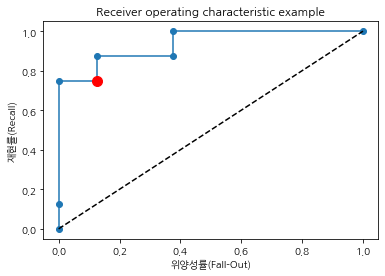

In [34]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

```
사이킷런 패키지에서 만들어진 모형은 기본적으로 정확도(accuracy)를 최대화하는 모형이다. 
하지만 정확도, 정밀도, 재현도 등의 성능이 동일한 모형도 ROC 커브에서 살펴보면 성능이 달라지는 것을 볼 수 있다.
```

In [35]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [36]:
print(confusion_matrix(y, y_hat1))

[[940   3]
 [ 30  27]]


In [37]:
print(confusion_matrix(y, y_hat2))

[[940   3]
 [ 30  27]]


In [38]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [39]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



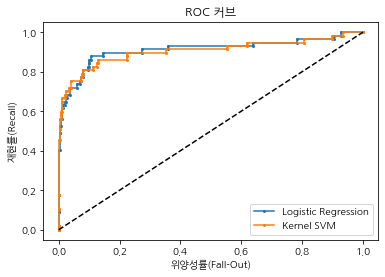

In [40]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()

In [41]:
# 서로 다른 모델이 컨퓨전 메트릭스가 동일하게 나온것은 
# 겹쳐지는 부분의 기준값을 기준으로 그려졌기 때문

### AUC
```
AUC(Area Under the Curve)는 ROC curve의 면적을 뜻한다. 
위양성률값이 같을 때 재현률값이 크거나 재현률값이 같을 때 위양성률값이 작을수록 AUC가 1에 가까운 값이고 좋은 모형이다.
```

In [42]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

```
다중 클래스에 대해서는 정밀도, 재현율을 구하거나 ROC 커브를 그릴 수 없으므로
(ROC커브는 이진분류에 대해서 그리는 것이기 때문)
각각의 클래스에 대해 OvR 문제를 가정하고 각각의 OvR 문제에 대해 ROC 커브를 그린다.
```

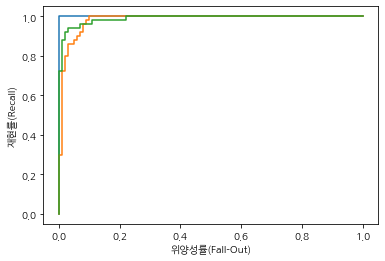

In [44]:
# IRIS는 세개의 클래스
# versicolor인지 아닌지 이런식으로 세개의 클래스에 대해 그리기 떄문에
# 클래스 수 만큼의 ROC커브가 나옴
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()